# RandomForestClassifier

In [1]:
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    f1_score,
    log_loss,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)

import matplotlib.pyplot as plt

### Load data

In [2]:
dataset = pd.read_csv(os.path.join('data', 'bioresponse.csv'))

In [3]:
dataset.head(5)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


### Train

In [4]:
X = dataset.drop('Activity', axis=1)
y = dataset.loc[:, 'Activity'].values

In [5]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Random forest on small trees

In [6]:
# model
small_model = RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)
small_model.fit(X=X_train, y=y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [7]:
# metrics
y_train_pred = small_model.predict(X=X_train)
y_test_pred = small_model.predict(X=X_test)
y_train_pred_proba = small_model.predict_proba(X=X_train)[:, 1]
y_test_pred_proba = small_model.predict_proba(X=X_test)[:, 1]

print(f"train precision_score: {np.round(precision_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test precision_score: {np.round(precision_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train recall_score: {np.round(recall_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test recall_score: {np.round(recall_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train accuracy_score: {np.round(accuracy_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test accuracy_score: {np.round(accuracy_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train f1_score: {np.round(f1_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test f1_score: {np.round(f1_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train log_loss: {np.round(log_loss(y_true=y_train, y_pred=y_train_pred_proba), 4)}")
print(f"test log_loss: {np.round(log_loss(y_true=y_test, y_pred=y_test_pred_proba), 4)}")
print()
print(f"train roc_auc_score: {np.round(roc_auc_score(y_true=y_train, y_score=y_train_pred_proba), 4)}")
print(f"test roc_auc_score: {np.round(roc_auc_score(y_true=y_test, y_score=y_test_pred_proba), 4)}")

train precision_score: 0.7659
test precision_score: 0.7708

train recall_score: 0.7552
test recall_score: 0.7607

train accuracy_score: 0.7465
test accuracy_score: 0.7345

train f1_score: 0.7605
test f1_score: 0.7658

train log_loss: 0.5841
test log_loss: 0.5888

train roc_auc_score: 0.8249
test roc_auc_score: 0.809


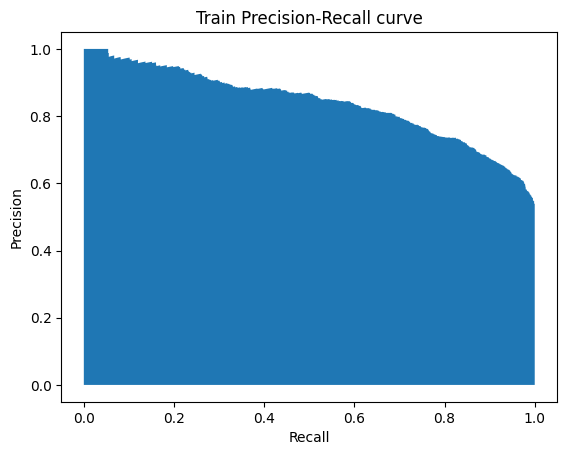

In [8]:
# precision_recall_curve train
train_precision, train_recall, _ = precision_recall_curve(y_true=y_train, probas_pred=y_train_pred_proba)
plt.fill_between(train_recall, train_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

Text(0.5, 1.0, 'Test Precision-Recall curve')

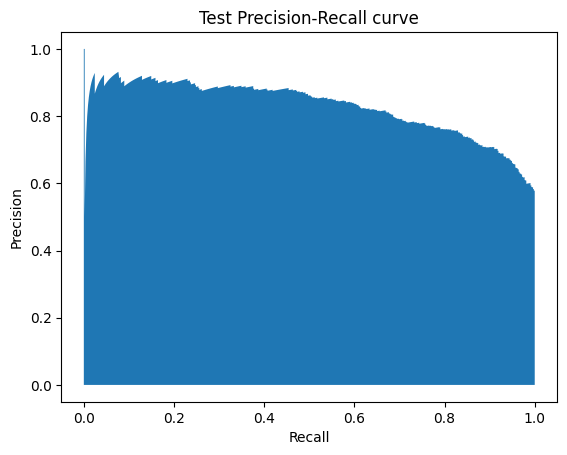

In [9]:
# precision_recall_curve test
test_precision, test_recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_test_pred_proba)
plt.fill_between(test_recall, test_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Test Precision-Recall curve")

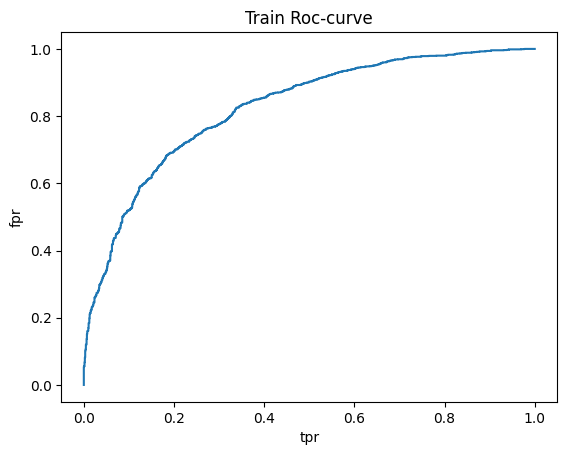

In [10]:
fpr_train, tpr_train, _ = roc_curve(y_true=y_train, y_score=y_train_pred_proba)
plt.plot(fpr_train, tpr_train)
plt.ylabel("fpr")
plt.xlabel("tpr")
plt.title("Train Roc-curve")
plt.show()

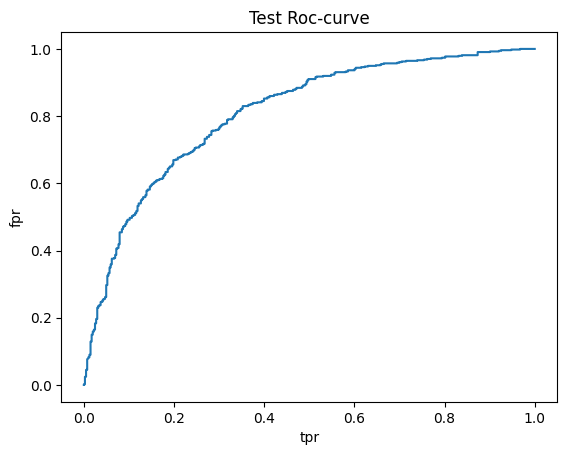

In [11]:
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=y_test_pred_proba)
plt.plot(fpr_test, tpr_test)
plt.ylabel("fpr")
plt.xlabel("tpr")
plt.title("Test Roc-curve")
plt.show()

#### Random forest on deep trees

In [12]:
deep_model = RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)
deep_model.fit(X=X_train, y=y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [13]:
# metrics
y_train_pred = deep_model.predict(X=X_train)
y_test_pred = deep_model.predict(X=X_test)
y_train_pred_proba = deep_model.predict_proba(X=X_train)
y_test_pred_proba = deep_model.predict_proba(X=X_test)

print(f"train precision_score: {np.round(precision_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test precision_score: {np.round(precision_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train recall_score: {np.round(recall_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test recall_score: {np.round(recall_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train accuracy_score: {np.round(accuracy_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test accuracy_score: {np.round(accuracy_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train f1_score: {np.round(f1_score(y_true=y_train, y_pred=y_train_pred), 4)}")
print(f"test f1_score: {np.round(f1_score(y_true=y_test, y_pred=y_test_pred), 4)}")
print()
print(f"train log_loss: {np.round(log_loss(y_true=y_train, y_pred=y_train_pred_proba), 4)}")
print(f"test log_loss: {np.round(log_loss(y_true=y_test, y_pred=y_test_pred_proba), 4)}")
print()
print(f"train roc_auc_score: {np.round(roc_auc_score(y_true=y_train, y_score=y_train_pred_proba[:, 1]), 4)}")
print(f"test roc_auc_score: {np.round(roc_auc_score(y_true=y_test, y_score=y_test_pred_proba[:, 1]), 4)}")

train precision_score: 1.0
test precision_score: 0.8327

train recall_score: 1.0
test recall_score: 0.8374

train accuracy_score: 1.0
test accuracy_score: 0.8113

train f1_score: 1.0
test f1_score: 0.835

train log_loss: 0.1412
test log_loss: 0.4583

train roc_auc_score: 1.0
test roc_auc_score: 0.8749


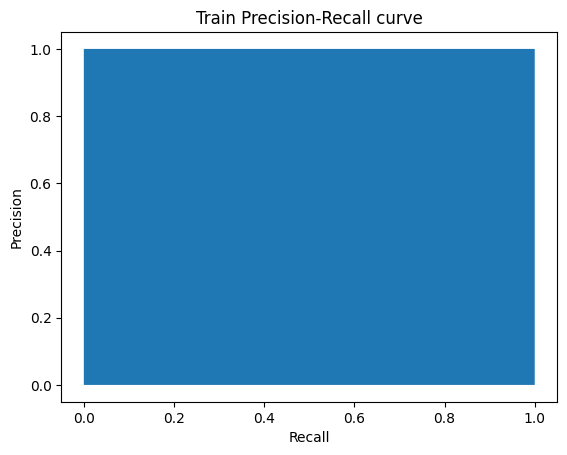

In [14]:
# precision_recall_curve train
train_precision, train_recall, thresholds = precision_recall_curve(y_true=y_train, probas_pred=y_train_pred_proba[:, 1])
plt.fill_between(train_recall, train_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

Text(0.5, 1.0, 'Test Precision-Recall curve')

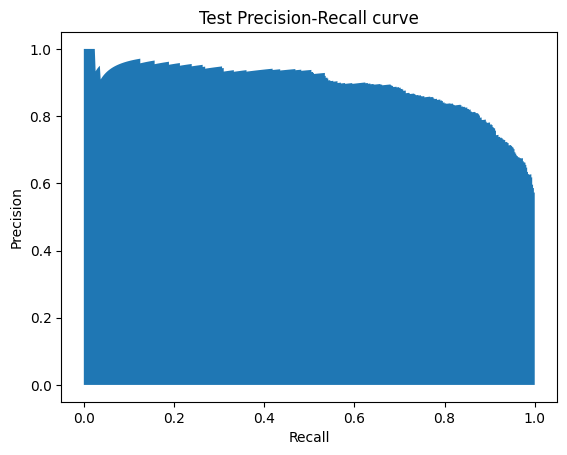

In [15]:
# precision_recall_curve test
test_precision, test_recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_test_pred_proba[:, 1])
plt.fill_between(test_recall, test_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Test Precision-Recall curve")

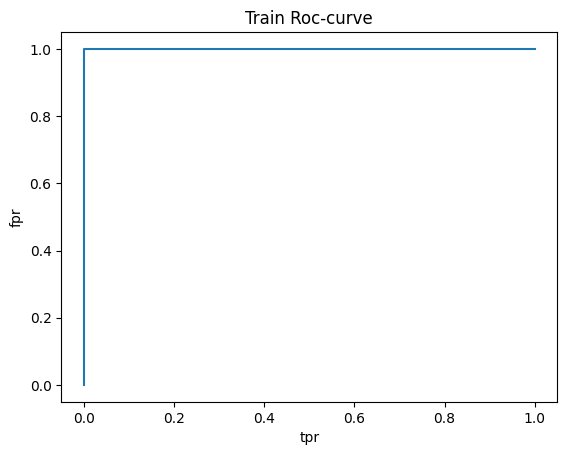

In [16]:
fpr_train, tpr_train, _ = roc_curve(y_true=y_train, y_score=y_train_pred_proba[:, 1])
plt.plot(fpr_train, tpr_train)
plt.ylabel("fpr")
plt.xlabel("tpr")
plt.title("Train Roc-curve")
plt.show()

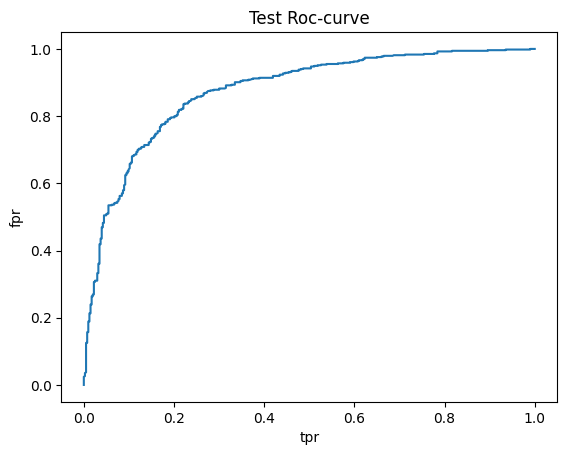

In [17]:
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=y_test_pred_proba[:, 1])
plt.plot(fpr_test, tpr_test)
plt.ylabel("fpr")
plt.xlabel("tpr")
plt.title("Test Roc-curve")
plt.show()